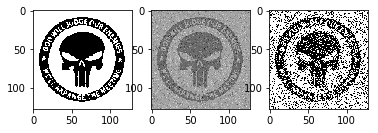

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
# import scipy as sp
# from matplotlib.pyplot import imread

def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im).astype('float')
    im2[index] += e[index]
    return im2

def add_saltnpeppar_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im)
    im2[index] = 1-im2[index]
    return im2

# proportion of pixels to alter
prop = 0.2
varSigma = 0.4
im = imageio.imread('army2.png')
im = im/255



fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')
im2 = add_gaussian_noise(im2,prop,varSigma)
ax2 = fig.add_subplot(132)
ax2.imshow(im2,cmap='gray')

im3 = add_saltnpeppar_noise(im,prop)
ax3 = fig.add_subplot(133)
ax3.imshow(im3,cmap='gray')

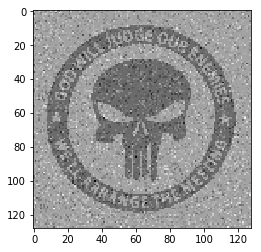

In [10]:
#gaussian noise image

fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.imshow(im2,cmap='gray')

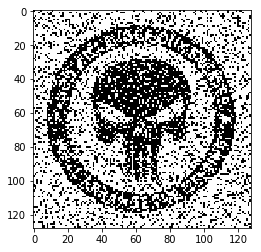

In [11]:
#salt and pepper image

fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.imshow(im3,cmap='gray')

In [12]:

def neighbours(i,j,M,N,size=4):
    if size==4:
        if (i==0 and j==0):
            n=[(0,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1)]
        return n
    if size==8:
        print('Not yet implemented\n')
        return -1

def neighborvalues(i, j, M, N, x, size = 4):
    return list(map(lambda el: x[el[0], el[1]], neighbours(i, j, M, N, size)))
    

def energyfunction(x, neighbors, y, beta, ita):
    return np.exp(beta * x * np.sum(neighbors) + ita*x*y)


#we use this one in our situation
def energyfunction2(x, neighbors, y, beta, ita):
    y_scaled = y*2 - 1
    return np.exp(beta * x * np.sum(neighbors) + ita* (- np.linalg.norm(x-y_scaled)))


    
M, N = im2.shape


# for i in range(x.shape[0]):
#     for j in range(x.shape[1]):
#         if x[i, j] < 0.5:
#             x[i,j] = -1
#         else:
#             x[i,j] = 1
        

beta = 1
ita = 2.1

# ICM

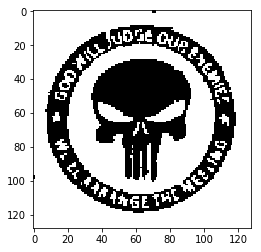

In [14]:
#first for gaussian noise
x = np.random.rand(im2.shape[0], im2.shape[1])
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z = np.random.rand()
        if z < 0.5:
            x[i,j] = -1
        else:
            x[i,j] = 1

# print(x)
changed = True
T = 100
count = 0

while changed:
        changed = False
        count = count + 1

        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
#                 print(x[i,j])
                neighbors = neighborvalues(i, j, M, N, x)
                y = im2[i,j]
                energy1 = energyfunction2(1, neighbors, y, beta, ita);
                energy2 = energyfunction2(- 1, neighbors, y, beta, ita)
#                 print(energy1/(energy1 + energy2))
                if energy1 > energy2:
                    if x[i, j] == -1:
                        changed = True
                    x[i,j] = 1
                else:
                    if x[i, j] == 1:
                        changed = True
                    x[i,j] = -1
            

fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(x,cmap='gray')
        

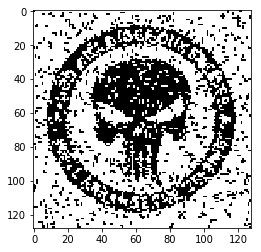

In [15]:
#now we try ICM with salt and pepper

x = np.random.rand(im2.shape[0], im2.shape[1])
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z = np.random.rand()
        if z < 0.5:
            x[i,j] = -1
        else:
            x[i,j] = 1

# print(x)
changed = True
T = 100
count = 0

while changed:
        changed = False
        count = count + 1

        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
#                 print(x[i,j])
                neighbors = neighborvalues(i, j, M, N, x)
                y = im3[i,j]
                energy1 = energyfunction2(1, neighbors, y, beta, ita);
                energy2 = energyfunction2(- 1, neighbors, y, beta, ita)
#                 print(energy1/(energy1 + energy2))
                if energy1 > energy2:
                    if x[i, j] == -1:
                        changed = True
                    x[i,j] = 1
                else:
                    if x[i, j] == 1:
                        changed = True
                    x[i,j] = -1
            

fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(x,cmap='gray')

# GIBBS

[[-1. -1.  1. ...  1.  1. -1.]
 [-1.  1. -1. ...  1. -1.  1.]
 [-1. -1. -1. ...  1. -1. -1.]
 ...
 [-1.  1. -1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1.  1.  1.]]


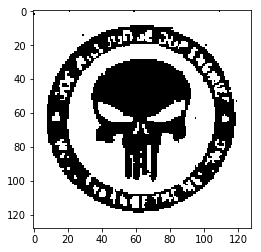

In [16]:
#Gibbs for gaussian noise
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z = np.random.rand()
        if z < 0.5:
            x[i,j] = -1
        else:
            x[i,j] = 1

print(x)                    
changed = True
T = 7
count = 0

for t in range(T):
        changed = False
        count = count + 1

        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
#                 print(x[i,j])
                neighbors = neighborvalues(i, j, M, N, x)
                y = im2[i,j]
                energy1 = energyfunction2(1, neighbors, y, beta, ita);
                energy2 = energyfunction2(-1, neighbors, y, beta, ita)
                posterior = energy1/(energy1 + energy2)
#                 print(posterior)
                z = np.random.rand()
                if z < posterior:
                    x[i,j] = 1
                else:
                    x[i,j] = -1
            
        

fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(x,cmap='gray')

[[-1. -1. -1. ...  1. -1.  1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1.  1.]
 ...
 [ 1.  1. -1. ... -1.  1. -1.]
 [ 1. -1. -1. ... -1. -1. -1.]
 [-1.  1. -1. ...  1.  1.  1.]]


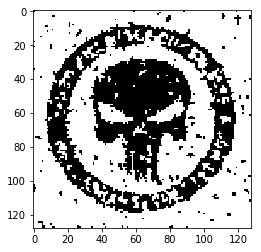

In [34]:
#Gibbs for salt and pepper noise
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z = np.random.rand()
        if z < 0.5:
            x[i,j] = -1
        else:
            x[i,j] = 1

print(x)                    
changed = True
T = 7
count = 0

for t in range(T):
        changed = False
        count = count + 1

        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
#                 print(x[i,j])
                neighbors = neighborvalues(i, j, M, N, x)
                y = im3[i,j]
                energy1 = energyfunction2(1, neighbors, y, beta, ita);
                energy2 = energyfunction2(-1, neighbors, y, beta, ita)
                posterior = energy1/(energy1 + energy2)
#                 print(posterior)
                z = np.random.rand()
                if z < posterior:
                    x[i,j] = 1
                else:
                    x[i,j] = -1
            
        

fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(x,cmap='gray')

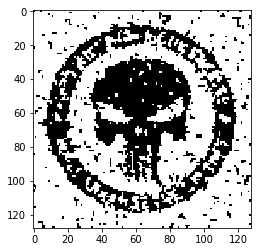

In [39]:
#Now we will try to pick random indices instead 
#Gibbs for salt and pepper noise
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z = np.random.rand()
        if z < 0.5:
            x[i,j] = -1
        else:
            x[i,j] = 1

changed = True
T = 7
count = 0

for t in range(T):
    changed = False
    count = count + 1
    #idk look up 128 numbers maybe for each timestep
    for k in range(x.shape[0]*x.shape[1]):
#         print(k)
        i = np.random.randint(0,x.shape[0])
        j = np.random.randint(0,x.shape[1])
#         print(i, j)
        neighbors = neighborvalues(i, j, M, N, x)
        y = im3[i,j]
        energy1 = energyfunction2(1, neighbors, y, beta, ita);
        energy2 = energyfunction2(-1, neighbors, y, beta, ita)
        posterior = energy1/(energy1 + energy2)
#         print(posterior)
        z = np.random.rand()
        if z < posterior:
            x[i,j] = 1
        else:
            x[i,j] = -1

        

fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(x,cmap='gray')